In [21]:
# Goal: make violin plots 
# import relevant packages, etc.
import itertools
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy import stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from axes_style import set_axes_style, set_axes_height


# increase the image resolution
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# set standard axes style
set_axes_style()

In [35]:
# import the data (make sure it is in the same folder or it will not import)
# r makes it a raw string to directly get the data
df = pd.read_csv("/Users/emilyfulk/Downloads/022122_fig1_2.csv")\


site                          object
genome                         int64
HK_count                       int64
RR_count                       int64
prodigal_gene_count            int64
HK_per_100_prodigal_genes    float64
RR_per_100                   float64
dtype: object

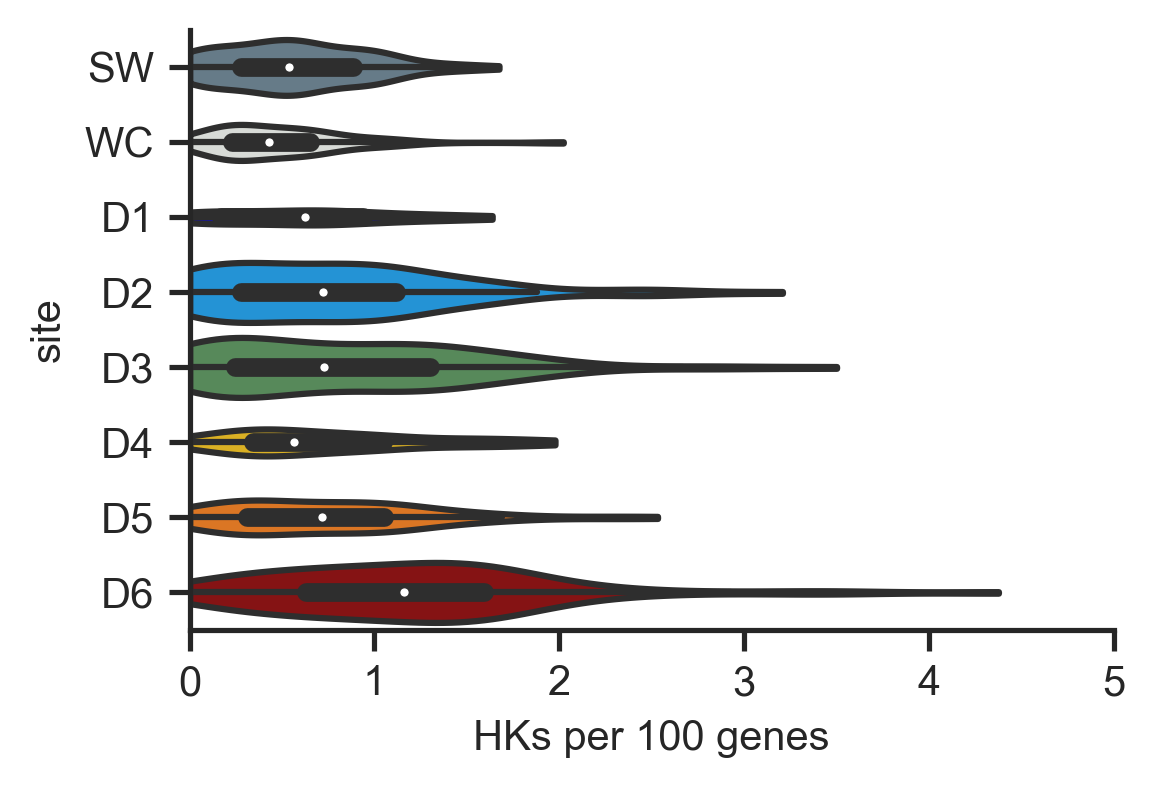

In [23]:
# make violin plot for HKs using Seaborn package 
# scale = count means that the width of the violins is scaled to how many sequences are found at each site/violin
# cut = 0 means that the range of the violin is the range of the observed data (not extending the probability density)
ax_HK = sns.violinplot(y="site", x="HK_per_100_prodigal_genes", data=df, palette=['#607c8e','#d8dcd6','#0504aa','#069af3',
                                                              '#4f9153','#fac205','#f97306','#980002'], scale = "count", cut=0)
# set the x axis to cut off at 0
ax_HK.set_xlim(0,5)
# label axes if not labeled already
ax_HK.set_xlabel("HKs per 100 genes")

# remove the right and top borders (but not the axes)
ax_HK.spines['right'].set_visible(False)
ax_HK.spines['top'].set_visible(False)

#set axes height
set_axes_height(ax_HK, 2)

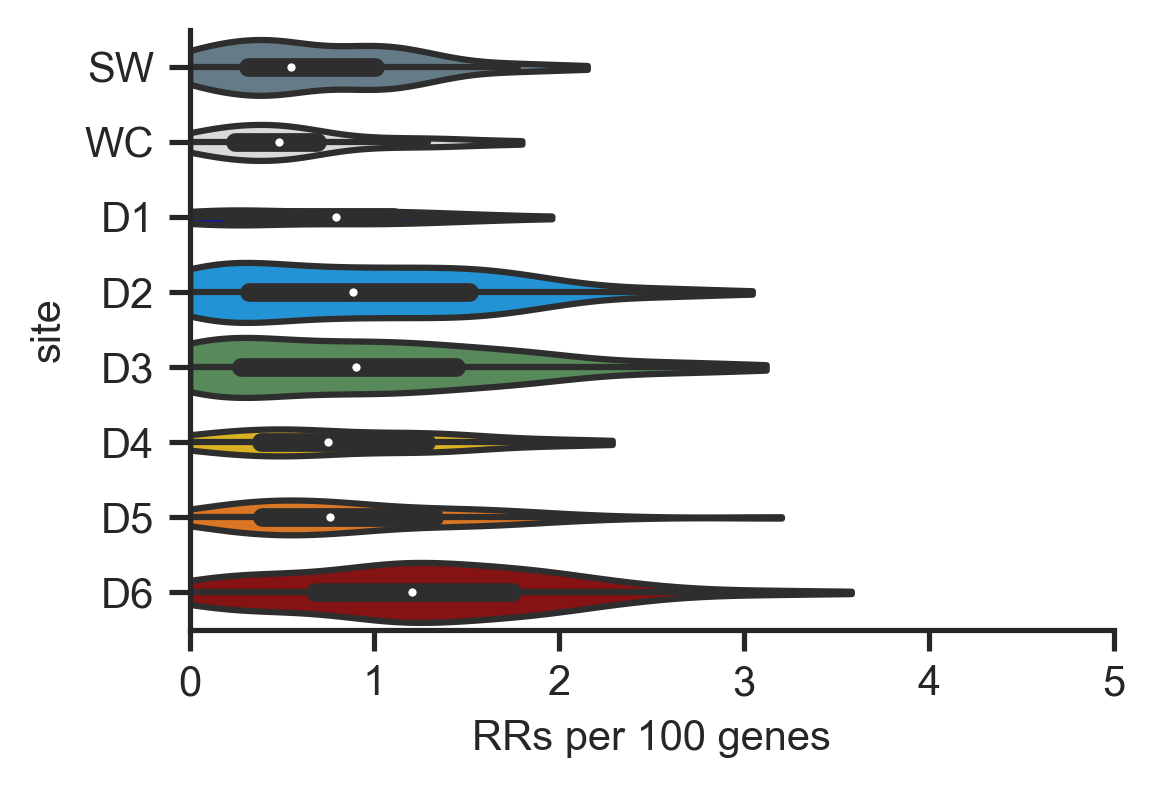

In [24]:
# make violin plot for RRs using Seaborn package 
# scale = count means that the width of the violins is scaled to how many sequences are found at each site/violin
# cut = 0 means that the range of the violin is the range of the observed data (not extending the probability density)
ax_RR = sns.violinplot(y="site", x="RR_per_100", data=df, palette=['#607c8e','#d8dcd6','#0504aa','#069af3', 
                                                              '#4f9153','#fac205','#f97306','#980002'], scale = "count", cut=0)
# set the x axis to cut off at 0
ax_RR.set_xlim(0,5)
ax_RR.xaxis.set_major_locator(MaxNLocator(integer=True))
# label axes if not labeled already
ax_RR.set_xlabel("RRs per 100 genes")
# remove the right and top borders (but not the axes)
ax_RR.spines['right'].set_visible(False)
ax_RR.spines['top'].set_visible(False)

#set axes height
set_axes_height(ax_RR, 2)

In [25]:
## export the figures
# note: can also export as .svg, which is useful if you want to combine panels in Affinity Designer, Illustrator, etc.
fig_HK = ax_HK.get_figure()
#fig_HK.savefig('220308_HK_abundance_fig1.svg', orientation='landscape', bbox_inches = "tight")

fig_RR = ax_RR.get_figure()
#fig_RR.savefig('2203081_RR_abundance_fig1.svg', orientation='landscape', bbox_inches = "tight")

In [26]:
## Statistics
sites = list(set(df["site"]))

print("HK_per_100")

for s in sites:
    temp = df["HK_per_100_prodigal_genes"][df["site"].str.contains(s)]
    mean = np.mean(temp)
    median = np.median(temp)
    print("Site: ",s,"Mean: ",mean,"Median: ",median)


# Apply 2-sample Kolmogorov-Smirnov test for each pair of distributions
for (a,b) in itertools.combinations(sites,2):
    dist1 = df["HK_per_100_prodigal_genes"][df["site"].str.contains(a)]
    dist2 = df["HK_per_100_prodigal_genes"][df["site"].str.contains(b)]

    KSstat, p = stats.ks_2samp(dist1, dist2, alternative = 'two-sided', mode='exact')

    print(a, b, "p-value:",p)

HK_per_100
Site:  D6 Mean:  1.1865599999999998 Median:  1.1585
Site:  D4 Mean:  0.7483555555555558 Median:  0.565
Site:  D2 Mean:  0.7997300000000002 Median:  0.719
Site:  D5 Mean:  0.7415862068965519 Median:  0.7175
Site:  SW Mean:  0.5702580645161288 Median:  0.539
Site:  D3 Mean:  0.8573199999999997 Median:  0.7295
Site:  WC Mean:  0.47806666666666664 Median:  0.429
Site:  D1 Mean:  0.6305200000000001 Median:  0.625
HK_per_100
D6 D4 p-value: 0.0006788854352381968
HK_per_100
D6 D2 p-value: 0.0007377026282063397
HK_per_100
D6 D5 p-value: 0.0002841388194450012
HK_per_100
D6 SW p-value: 2.0187096438917251e-10
HK_per_100
D6 D3 p-value: 0.009878183186176536
HK_per_100
D6 WC p-value: 2.3853807817886263e-11
HK_per_100
D6 D1 p-value: 0.002491955477820995
HK_per_100
D4 D2 p-value: 0.5856955490434008
HK_per_100
D4 D5 p-value: 0.9597672143576385
HK_per_100
D4 SW p-value: 0.38340476825080183
HK_per_100
D4 D3 p-value: 0.27816837512052806
HK_per_100
D4 WC p-value: 0.022580554299225897
HK_per_100
D

In [27]:
# Apply 2-sample Kolmogorov-Smirnov test for each pair of distributions
print("RR_per_100")

for s in sites:
    temp = df["RR_per_100"][df["site"].str.contains(s)]
    mean = np.mean(temp)
    median = np.median(temp)
    print("Site: ",s,"Mean: ",mean,"Median: ",median)

for (a,b) in itertools.combinations(sites,2):
    dist1 = df["RR_per_100"][df["site"].str.contains(a)]
    dist2 = df["RR_per_100"][df["site"].str.contains(b)]

    KSstat, p = stats.ks_2samp(dist1, dist2, alternative = 'two-sided', mode='exact')


    print(a, b, "p-value:",p)

RR_per_100
Site:  D6 Mean:  1.26379 Median:  1.2025000000000001
Site:  D4 Mean:  0.8549777777777781 Median:  0.749
Site:  D2 Mean:  0.9525100000000001 Median:  0.885
Site:  D5 Mean:  0.8897241379310342 Median:  0.758
Site:  SW Mean:  0.6993440860215051 Median:  0.549
Site:  D3 Mean:  0.9770299999999998 Median:  0.901
Site:  WC Mean:  0.5671333333333333 Median:  0.4845
Site:  D1 Mean:  0.7094 Median:  0.792
D6 D4 p-value: 0.006170151269322299
D6 D2 p-value: 0.015577131622877688
D6 D5 p-value: 0.00035557779368622366
D6 SW p-value: 6.02775177549475e-08
D6 D3 p-value: 0.024055802841094577
D6 WC p-value: 9.052755212124453e-10
D6 D1 p-value: 0.0034889710103950256
D4 D2 p-value: 0.4664298625710507
D4 D5 p-value: 0.9785842673099763
D4 SW p-value: 0.2202229676783206
D4 D3 p-value: 0.6270401668337233
D4 WC p-value: 0.015909483200074126
D4 D1 p-value: 0.534243584582186
D2 D5 p-value: 0.5320562057602662
D2 SW p-value: 0.008053113893288666
D2 D3 p-value: 0.9942356257694902
D2 WC p-value: 9.89511788

In [28]:
# Apply one-way ANOVA between each site

D1 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D1")]
D2 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D2")]
D3 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D3")]
D4 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D4")]
D5 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D5")]
D6 = df["HK_per_100_prodigal_genes"][df["site"].str.contains("D6")]
WC = df["HK_per_100_prodigal_genes"][df["site"].str.contains("WC")]
SW = df["HK_per_100_prodigal_genes"][df["site"].str.contains("SW")]

ANOVA_F, ANOVA_p = stats.f_oneway(D1, D2, D3, D4, D5, D6, WC, SW)

print(ANOVA_F,ANOVA_p)

10.73061935564658 9.774787770943566e-13


In [36]:
# Apply posthoc Tukey test to determine which groups are significantly different

tukey_results = pairwise_tukeyhsd(df['HK_per_100_prodigal_genes'],df['site'],alpha=0.05)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    D1     D2   0.1692    0.9 -0.2414  0.5798  False
    D1     D3   0.2268 0.6748 -0.1838  0.6374  False
    D1     D4   0.1178    0.9 -0.3402  0.5759  False
    D1     D5   0.1111    0.9 -0.3283  0.5504  False
    D1     D6    0.556 0.0011  0.1454  0.9666   True
    D1     SW  -0.0603    0.9 -0.4739  0.3534  False
    D1     WC  -0.1525    0.9 -0.5896  0.2847  False
    D2     D3   0.0576    0.9 -0.2021  0.3173  False
    D2     D4  -0.0514    0.9  -0.381  0.2782  False
    D2     D5  -0.0581    0.9 -0.3612  0.2449  False
    D2     D6   0.3868  0.001  0.1271  0.6465   True
    D2     SW  -0.2295  0.144  -0.494  0.0351  False
    D2     WC  -0.3217 0.0256 -0.6215 -0.0218   True
    D3     D4   -0.109    0.9 -0.4386  0.2207  False
    D3     D5  -0.1157    0.9 -0.4188  0.1873  False
    D3     D6   0.3292 0.0032  0.0696  0.5889 